In [1]:
# Common imports
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

def FrankeFunction_withoutnoise(x,y): #Definition of the Franke function
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 

def FrankeFunction(x,y): #Definition of the Franke function with a noise
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x)) #noise defined with the normal distribution N(0,0.1)
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise

def create_X(x, y, n ):  #creation of the matrix X
    if len(x.shape) > 1:
            x = np.ravel(x)   #gives a 1D array
            y = np.ravel(y)
    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))
    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

def R2(y_data, y_model):  #function to determine de R2 score of the fit 
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data, y_model): #function to determine the mean squarred error of the fit 
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

N = 100 #Number of data
seed = 31415
np.random.seed(seed)
x = np.sort(np.random.uniform(0, 1, N)) #sort data to plot correctly
y = np.sort(np.random.uniform(0, 1, N))

x, y = np.meshgrid(x,y)  #x et y dim = 2, Creates a grid for the evaluation of the 2 dimension Franke's function
z = FrankeFunction(x, y) #dim =2
z_without = FrankeFunction_withoutnoise(x, y) #dim =2

x_dim1 = x.ravel() #dim =1
y_dim1 = y.ravel() #dim =1
z_dim1 = z.ravel() #dim =1


n = 10  #number of the polynomial order

#Creating list to store the results 
testing_error=[]
training_error =[]
testing_r2=[]
training_r2 =[]


for poly in range (1,n+1): #loop for the polynomial order

    # Create the design matrix
    X = create_X(x_dim1,y_dim1, n)
    X_train, X_test, z_train, z_test = train_test_split(X,z_dim1,test_size=0.2)
    
    #Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # OLS using scikit learn library
    clf = skl.LinearRegression().fit(X_train_scaled, z_train)

    testing_error.append(MSE(z_test, clf.predict(X_test_scaled)))
    training_error.append(MSE(z_train, clf.predict(X_train_scaled)))
    testing_r2.append(R2(z_test,clf.predict(X_test_scaled)))
    training_r2.append(R2(z_train,clf.predict(X_train_scaled)))
    
    print('Polynomial degree:', poly)
    print("MSE: {:.2f}".format(MSE(z_test, clf.predict(X_test_scaled))))
    print("R2: {:.2f}".format(R2(z_test,clf.predict(X_test_scaled))))

    #Prediction of the z value using OLS model
    zpred = clf.predict(X) #dim = 1
    
    #Reshaping array without changing the data
    zplot = zpred.reshape(N, N) #dim =2


Polynomial degree: 1
MSE: 0.01
R2: 0.90
Polynomial degree: 2
MSE: 0.01
R2: 0.89
Polynomial degree: 3
MSE: 0.01
R2: 0.90
Polynomial degree: 4
MSE: 0.01
R2: 0.90
Polynomial degree: 5
MSE: 0.01
R2: 0.90
Polynomial degree: 6
MSE: 0.01
R2: 0.90
Polynomial degree: 7
MSE: 0.01
R2: 0.90
Polynomial degree: 8
MSE: 0.01
R2: 0.90
Polynomial degree: 9
MSE: 0.01
R2: 0.90
Polynomial degree: 10
MSE: 0.01
R2: 0.90


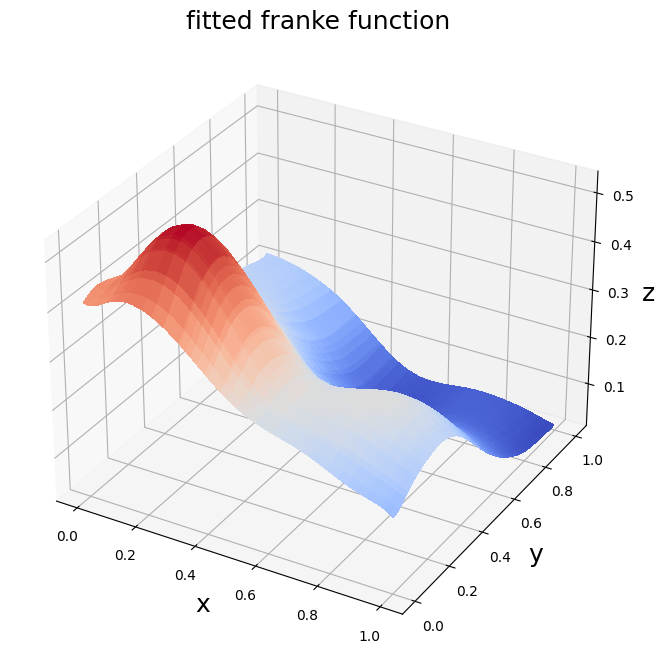

In [2]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.plot_surface(x,y,zplot,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_title('fitted franke function', fontsize=18)
plt.show()

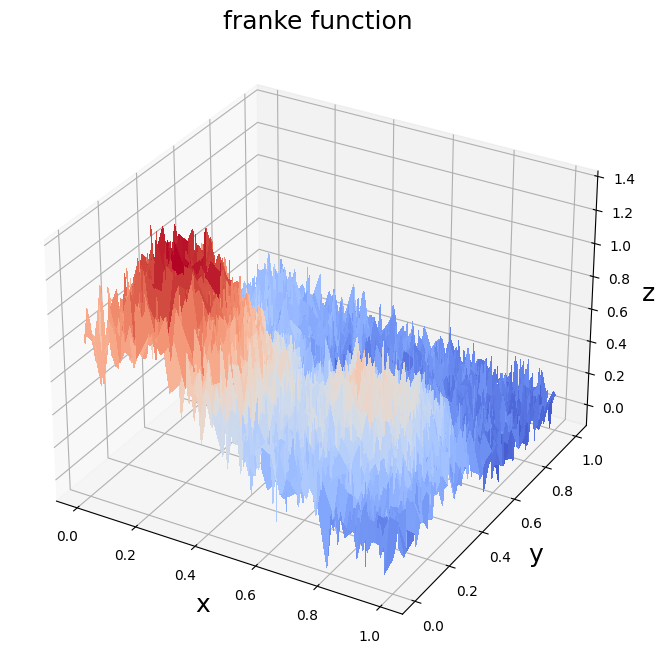

In [3]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_title('franke function', fontsize=18)
plt.show()

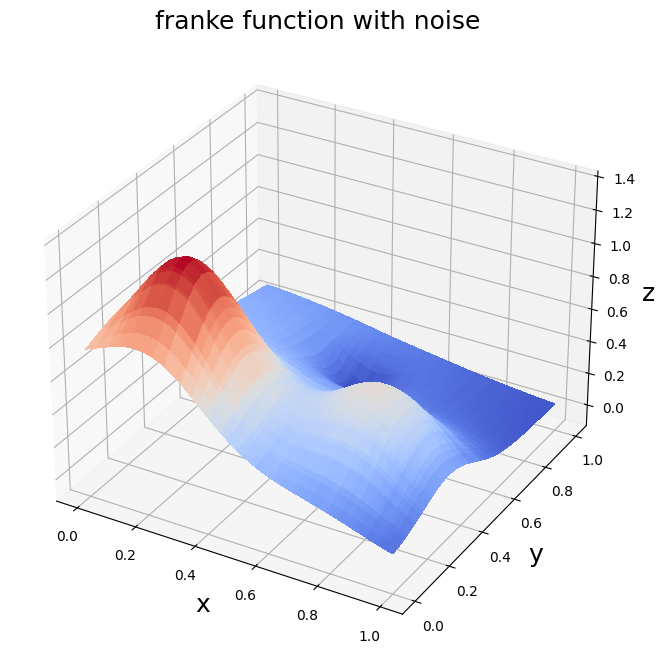

In [4]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.plot_surface(x,y,z_without,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_title('franke function with noise', fontsize=18)
plt.show()